# Project: Investigate an healthcare dataset collecting information from 100k medical appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I have analysed the No-show dataset, which is available on Kaggle. This dataset contains information related to arround 100,000 patients in Brazil. It includes information about patient: ID, Gender, Age, Neighbourhood where they live, their access to Scholarship, if they have Hipertension, Diabetes, Alcoholism and/or an Handicap. It also contains information about the appointment that was taken: Scheduled Day, Appointment Day, if they received an SMS to remind them and if they show up or not.  

This dataset can help to understand various factors like distribution of appointments by age & gender, relation between the age and any health issues mentioned above, or if there is any value to send a SMS to ensure patients don't bail their appointment.

Note: For this analysis, inferential statistics or machine learning are not used so findings are tentative.

Through Exploratory Data Analysis, we will find hidden patterns which will help us draw conclusions.

I am focusing on answering following questions as part of this project:

In [340]:
# Packages we will use for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Style and size of graph

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10,8)})

<a id='wrangling'></a>
## Data Wrangling

During this step, we are going to import the csv file and display its main information. We will perform the following steps:

Display the info of the dataset and get the idea of the size, number of records and number of columns
Familiarize with the dataset and find any unusal values

### Data loading

In [341]:
# Data loading using pandas
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [342]:
print("Let's look at the shape:")
print("rows=",df.shape[0],"columns=",df.shape[1])

Let's look at the shape:
rows= 110527 columns= 14


In [343]:
#check basis information of the dataset
print("Quick look at some statistics about our dataset: \n\n")
df.describe()

Quick look at some statistics about our dataset: 




,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [344]:
print("Let's ensure there is no null:")
df.isnull().sum()

Let's ensure there is no null:


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [345]:
print("Now, let's now ensure there is no duplicate:")
sum(df.duplicated())

Now, let's now ensure there is no duplicate:


0

In [346]:
print("The data types of our dataframe is:")
df.dtypes

The data types of our dataframe is:


PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

### Data Cleaning to prepare our dataset for EDA

### Observations and step to clean the data, based on accessing the No-show dataset file

- The columns "PatientId" is not relevant for this analysis, we drop it.
- No-show column is dropped to have Show column created (in replacement of No-Show), and then converted from String to Integer.
- No missing value found in any columns
- No duplicates found
- Nb_health-issues created to sum all the health issues existing in this dataset

In [347]:
#Dropping columns PatientId
print("I want to drop 1 column, Patient ID, since I cannot really see the value of having it for the analysis.")
df.drop(['PatientId'], axis=1, inplace=True)

I want to drop 1 column, Patient ID, since I cannot really see the value of having it for the analysis.


In [348]:
#Creation of the the Column 'Show', which is intended to be an integer of 1 when the patient showed up.
df['Show'] = ['1' if x == 'No' else '0' for x in df['No-show']]
print("Creation of the Show column upon No-show data.")

Creation of the Show column upon No-show data.


In [349]:
#Dropping the No-show columns, which was a string. The show columns created upon the No-show column will allow us to
#look at correlation
df.drop(['No-show'], axis=1, inplace=True)
print("No-show column has been dropped.")

No-show column has been dropped.


In [350]:
#function to convert str to int
print('Changing the data type of show, from String to Integer.')
def str_to_int(input):
    return np.int(float(input))

df['Show'] = df['Show'].apply(str_to_int)

Changing the data type of show, from String to Integer.


In [351]:
#Creation of a new column, summing all the health issues listed in the dataset
df['Nb_health_issues'] = df['Hipertension'] + df['Diabetes'] + df['Alcoholism'] + df['Handcap']
print('Nb_health_issue column has been created. This will help us to see if there are relationship between this new column and the age or the attendance for example.')

Nb_health_issue column has been created. This will help us to see if there are relationship between this new column and the age or the attendance for example.


In [352]:
print('Looking at our dataset after the changes being done.')
df.head()

Looking at our dataset after the changes being done.


,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,Nb_health_issues
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1,1
1,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1,0
3,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0
4,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1,2


In [353]:
print("Let's ensure there is no null after all the changes we have made:")
df.isnull().sum()

Let's ensure there is no null after all the changes we have made:


AppointmentID       0
Gender              0
ScheduledDay        0
AppointmentDay      0
Age                 0
Neighbourhood       0
Scholarship         0
Hipertension        0
Diabetes            0
Alcoholism          0
Handcap             0
SMS_received        0
Show                0
Nb_health_issues    0
dtype: int64

In [354]:
print("Lookig at the data type, ensuring it will allow us to analyze it as needed:")
df.dtypes

Lookig at the data type, ensuring it will allow us to analyze it as needed:


AppointmentID        int64
Gender              object
ScheduledDay        object
AppointmentDay      object
Age                  int64
Neighbourhood       object
Scholarship          int64
Hipertension         int64
Diabetes             int64
Alcoholism           int64
Handcap              int64
SMS_received         int64
Show                 int64
Nb_health_issues     int64
dtype: object

Looking at how the data is distributed:


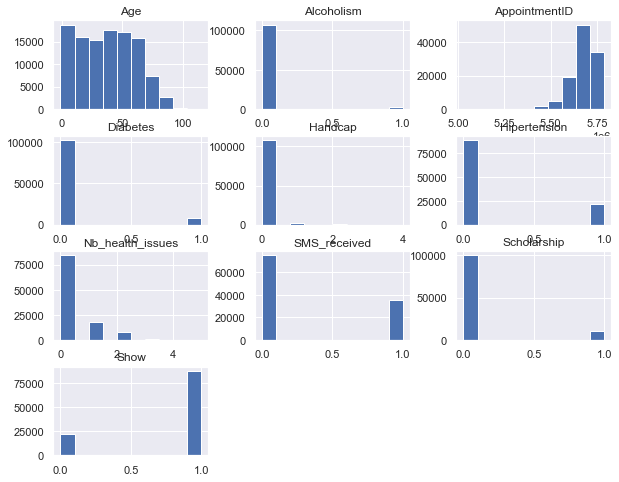

In [355]:
print('Looking at how the data is distributed:')
df.hist();

Looking at the Age histogram above, we can see that there is a lot of patients with the age of 0. Hopefully 0 represents newborns and not missing data. By looking at the data closer, we can see there is one patient with the age of -1.

In [356]:
print("Indeed, it seems like there is some unnaccuracy in the way it was collected, look at the age:")
df[df['Age'] == -1]

Indeed, it seems like there is some unnaccuracy in the way it was collected, look at the age:


,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,Nb_health_issues
99832,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,1,0


<a id='eda'></a>
## Exploratory Data Analysis

Now that ywe've trimmed and cleaned our data, we're ready to move on to exploration. We are going to compute statistics and create visualizations with the goal of addressing the research questions we have addressed in the introduction. 

### 1: Is the age a variable influencing the attendance to an appointment?

In [357]:
#we have to look first at some statistics about the Age data.
print('The age is a widespread value, we have to look at some statistics to see if we can cut the data in groups:')
df['Age'].describe()

The age is a widespread value, we have to look at some statistics to see if we can cut the data in groups:


count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

Let's use the min value, the 25 percentile, the median, the 75 percentile and the max value to store the age data in 4 groups.

In [358]:
#let's explore the age a bit more by cutting the group into bins, then we will look if the total numbers of folks who show up
#change substantially
print('The bins are created, using the statistics data above:')
bin_edges= [0, 18, 37, 75, 115]
bin_edges

The bins are created, using the statistics data above:


[0, 18, 37, 75, 115]

In [359]:
print('We are giving names to these groups:')
bin_names = ['Minor', 'Young Adult', 'Adult', 'Old']
bin_names

We are giving names to these groups:


['Minor', 'Young Adult', 'Adult', 'Old']

In [360]:
#We are using pandas's cut function to execute the storing of age data in our four groups
df['age_group']=pd.cut(df['Age'], bin_edges, labels=bin_names)

In [361]:
print("To ensure our new column has been created, and our cutting worked well, we are printing the first row:")
df.head(1)

To ensure our new column has been created, and our cutting worked well, we are printing the first row:


,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,Nb_health_issues,age_group
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1,1,Adult


Our new column has been successfully created! Let's look the proportion of attendance by age groups now!

In [362]:
Proportion = (df[df['Show'] == 1].groupby('age_group')['Show'].count() / df.groupby('age_group')['Show'].count()) * 100
print("Here is the proportion of patients attending their appointment by age groups, in percentage %:")
Proportion

Here is the proportion of patients attending their appointment by age groups, in percentage %:


age_group
Minor          77.462787
Young Adult    76.462385
Adult          82.275899
Old            83.864985
Name: Show, dtype: float64

We can now visually see the proportion of attendance by age groups:


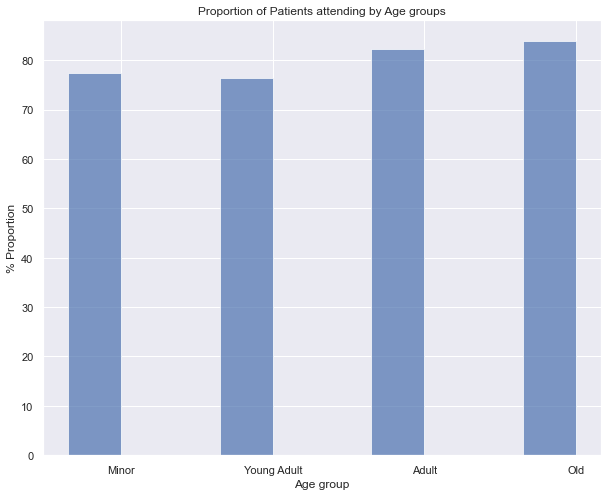

In [363]:
# plot bars
print('We can now visually see the proportion of attendance by age groups:')
ind = np.arange(len(Proportion))  # the x locations for the groups
width = 0.35       # the width of the bars


Blue_bars = plt.bar(ind, Proportion, width, color='b', alpha=.7)

# title and labels
plt.ylabel('% Proportion')
plt.xlabel('Age group')
plt.title('Proportion of Patients attending by Age groups')
locations = ind + width / 2  # xtick locations
labels = ['Minor', 'Young Adult', 'Adult', 'Old']  # xtick labels
plt.xticks(locations, labels)

plt.show()

As seen on the distribution, the older you are, the more likely you are to show up. These people likely have more health issues too as we will see further below (Question 3).

### 2: Now that we have seen the proportion of attendance by age groups. What is the number of appointments by age and gender?

In [364]:
#We have to use groupby function again to group by age and gender
print('The grouping is done:')
df_gender_age = df.groupby(['Age', 'Gender']).agg(appointment=('AppointmentID', 'count'))
df_gender_age

The grouping is done:


appointment
Age  Gender             
-1   F                 1
 0   F              1721
     M              1818
 1   F              1088
     M              1185
...                  ...
 99  F                 1
 100 F                 2
     M                 2
 102 F                 2
 115 F                 5

[204 rows x 1 columns]

The age has been automatically set as index, we need to change that.

In [365]:
#Let's use reset_index function to remove the age as index
df_gender_age.reset_index(drop=False, inplace=True)

In [366]:
#We need to look at the first 5 rows to ensure the operation computed above worked
print('The structure of the data is:')
df_gender_age.head()

The structure of the data is:


,Age,Gender,appointment
0,-1,F,1
1,0,F,1721
2,0,M,1818
3,1,F,1088
4,1,M,1185


The plotting of "Number of appointments by age and gender" : 


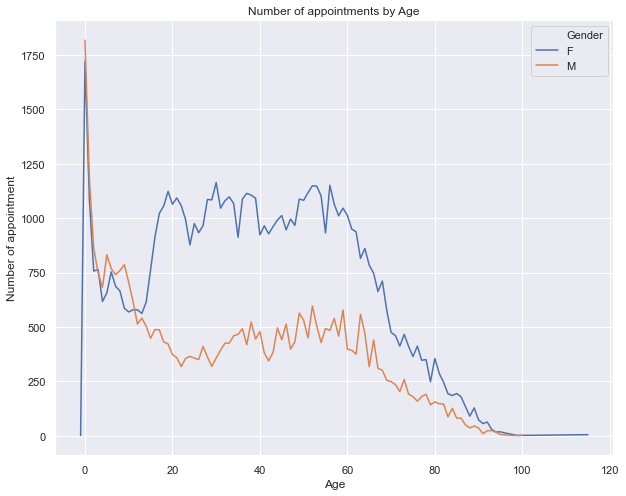

In [367]:
#Let's plot this now:
print('The plotting of "Number of appointments by age and gender" : ')

sns.lineplot(x = 'Age', y = 'appointment', hue="Gender",ci=None, data=df_gender_age)
plt.title("Number of appointments by Age")
plt.ylabel("Number of appointment")
plt.xlabel("Age")
plt.show()

Clearly, the number of appointments increases with the age. Female tends to have more health appointment that men.
The age mode for both male and female is 0 (where both curves peak!).

### 3: Is there any correlation between all the health issue variables, the age and the attendance?

In [368]:
#Setting up the correlation grid to see the relation between variables
print('The correlation grid:')
df_health = df[['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'Nb_health_issues', 'Show']]
corr = df_health.corr()
corr.style.background_gradient(cmap='coolwarm')

The correlation grid:


,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,Nb_health_issues,Show
Age,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.483631,0.060319
Scholarship,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,-0.015290,-0.029135
Hipertension,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,0.851803,0.035701
Diabetes,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,0.701738,0.015180
Alcoholism,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,0.336109,0.000196
Handcap,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,0.331124,0.006076
Nb_health_issues,0.483631,-0.015290,0.851803,0.701738,0.336109,0.331124,1.000000,0.030318
Show,0.060319,-0.029135,0.035701,0.015180,0.000196,0.006076,0.030318,1.000000


Indeed, the relation between the age and the number of health issue is quite significant. Hipertension being the most represented among these observations.

Although, Number of health issues doesn't correlate the attendance.

### 4: Does having a scholarship make people attend their appointment more? 

In [369]:
#We need to use groupby function again to create a new dataset where we will be able to compare the attendance
#depending of the Scholarship access and the gender
print('The new dataframe looks like this:')
df_scholarship = (df[df['Show'] == 1].groupby(['Scholarship','Gender'])['Show'].count() / df.groupby(['Scholarship','Gender'])['Show'].count())*100
df_scholarship

The new dataframe looks like this:


Scholarship  Gender
0            F         80.173687
             M         80.225742
1            F         76.211454
             M         76.494024
Name: Show, dtype: float64

We can now visually see the proportion of attendance depending of the scholarship access and gender is below:


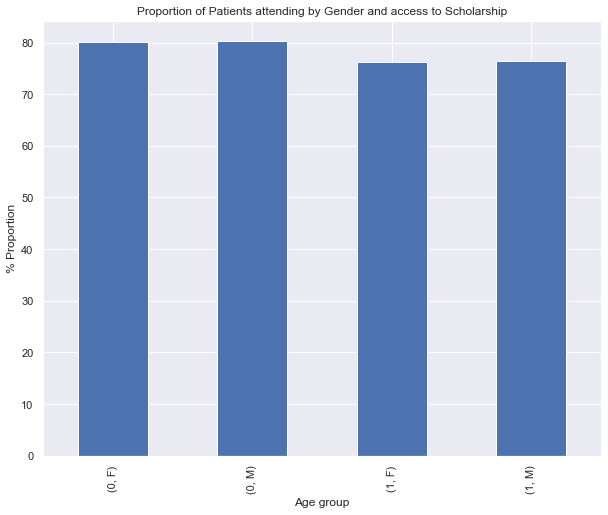

In [370]:
#Let's plot this now
print('We can now visually see the proportion of attendance depending of the scholarship access and gender is below:')
df_scholarship.plot(kind='bar')
plt.ylabel('% Proportion')
plt.xlabel('Age group')
plt.title('Proportion of Patients attending by Gender and access to Scholarship')
plt.show()

Strangely, people with Scholarship tend to attend their apppointment less than people without, regarless of their gender.
The proportion of attendance by Gender, regardless of scholarship, is not very different from one gender to another.

### 5: Is there a big difference of attendance depending of the neighbourhood?

In [371]:
#We have to create a neighbourhood dataset now
print('The new dataset looks like this:')
df_neighbourhood1 =  (df[df['Show'] == 1].groupby(['Neighbourhood']).agg(appointment=('AppointmentID', 'count')) / df.groupby(['Neighbourhood']).agg(appointment=('AppointmentID', 'count'))) * 100
df_neighbourhood1

The new dataset looks like this:


,appointment
Neighbourhood,
AEROPORTO,87.500000
ANDORINHAS,76.967286
ANTÔNIO HONÓRIO,81.549815
ARIOVALDO FAVALESSA,78.014184
BARRO VERMELHO,78.486998
...,...
SÃO JOSÉ,78.351037
SÃO PEDRO,78.962418
TABUAZEIRO,81.704981


As before, we need to change the index that was automatically set.

In [372]:
#Let's use reset_index to change the index
print('The neighbourhood dataset doesnt have neighbourhood index anymore. The dataset looks like this:')
df_neighbourhood1.reset_index(drop=False, inplace=True)
df_neighbourhood1

The neighbourhood dataset doesnt have neighbourhood index anymore. The dataset looks like this:


,Neighbourhood,appointment
0,AEROPORTO,87.500000
1,ANDORINHAS,76.967286
2,ANTÔNIO HONÓRIO,81.549815
3,ARIOVALDO FAVALESSA,78.014184
4,BARRO VERMELHO,78.486998
...,...,...
76,SÃO JOSÉ,78.351037
77,SÃO PEDRO,78.962418
78,TABUAZEIRO,81.704981
79,UNIVERSITÁRIO,78.947368


In [373]:
#Let's use the sort_value function to filter the 5 best neighbourhood in terms of attendance
print('The 5 best neighbourhoods in terms of attendance % are:')
df_neighbourhood1 = df_neighbourhood1.sort_values(['appointment'], ascending = False).head(5)
df_neighbourhood1

The 5 best neighbourhoods in terms of attendance % are:


,Neighbourhood,appointment
51,PARQUE INDUSTRIAL,100.000000
31,ILHA DO BOI,91.428571
0,AEROPORTO,87.500000
48,MÁRIO CYPRESTE,85.444744
73,SOLON BORGES,85.287846


In [374]:
#Let's use the sort_value function to filter the 5 best neighbourhood in terms of attendance, as above, we are going to change
#the index with reset_index too
print('The 5 worst neighbourhoods in terms of attendance % are:')
df_neighbourhood2 =  (df[df['Show'] == 1].groupby(['Neighbourhood']).agg(appointment=('AppointmentID', 'count')) / df.groupby(['Neighbourhood']).agg(appointment=('AppointmentID', 'count'))) * 100
df_neighbourhood2.reset_index(drop=False, inplace=True)
df_neighbourhood2 = df_neighbourhood2.sort_values(['appointment'], ascending = True).head(5)
df_neighbourhood2

The 5 worst neighbourhoods in terms of attendance % are:


,Neighbourhood,appointment
70,SANTOS DUMONT,71.081505
61,SANTA CECÍLIA,72.544643
62,SANTA CLARA,73.517787
36,ITARARÉ,73.733637
40,JESUS DE NAZARETH,75.604627


In [375]:
#let's re-order the second dataset, and then append it to the first one
print('Both neighbourhood datasets, the 5 best and the 5 worst in terms of attendance, are now appended:')
df_neighbourhood2= df_neighbourhood2.sort_values(['appointment'], ascending = False)
df_neighbourhood = df_neighbourhood1.append(df_neighbourhood2)
df_neighbourhood

Both neighbourhood datasets, the 5 best and the 5 worst in terms of attendance, are now appended:


,Neighbourhood,appointment
51,PARQUE INDUSTRIAL,100.000000
31,ILHA DO BOI,91.428571
0,AEROPORTO,87.500000
48,MÁRIO CYPRESTE,85.444744
73,SOLON BORGES,85.287846
40,JESUS DE NAZARETH,75.604627
36,ITARARÉ,73.733637
62,SANTA CLARA,73.517787
61,SANTA CECÍLIA,72.544643
70,SANTOS DUMONT,71.081505


We can now visually see the difference of attendance by neighbourhood by looking at the 5 best and the 5 worst in terms of attendance %:


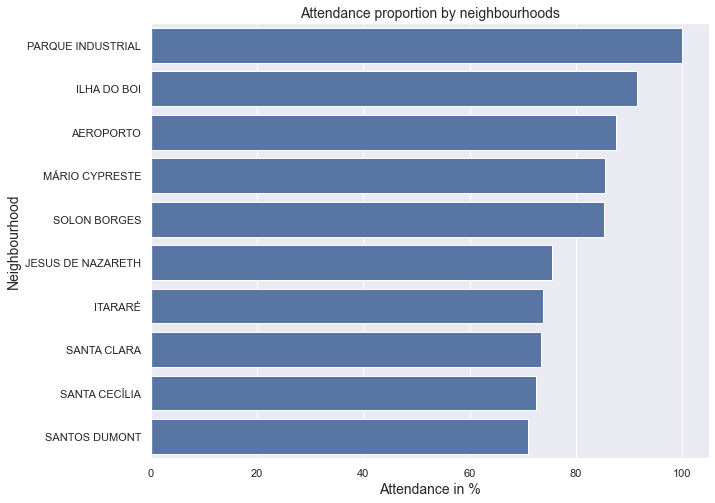

In [376]:
#Let's plot this dataset
print('We can now visually see the difference of attendance by neighbourhood by looking at the 5 best and the 5 worst in terms of attendance %:')
g = sns.barplot(data=df_neighbourhood,x ='appointment', y ='Neighbourhood', color = "b")

#plt.gca().invert_yaxis()

# Graph features
plt.title("Attendance proportion by neighbourhoods", fontsize = 14)
plt.ylabel("Neighbourhood", fontsize = 14)
plt.xlabel("Attendance in %", fontsize = 14)

plt.show()

We can see that the attendance varies quite significantly from one Neighbourhood to another.

<a id='conclusions'></a>
## Conclusions

In this report, we have analyzed some factors and general trends from the No-show dataset. Findings are tentative and not verified by the principles of statistics and machine learning. The following are some of the conclusions based on the analysis.

In conclusion, we can assert that:
- The age is a variable that shows a different attendance rate from one age group to another. The older one is, the more likely we can expect this person to attend his/her appointment. In addition, the number of appointments for Young children is the highest, with the lowest proportion of attendance.

- The distribution of attendance by neighborhoods seems to be meaningful too since some neighbourhood show a very high level of attendance and others have a level of attendance much lower.

- The Scholarship doesn't seems to work effectively. From a data point of view, no pattern seems to encourage more attendance from this variable.

- Also, it seems like any pre-existing health issues (Diabetes, Hypertension, etc) are driving better attendance. It is important to keep in mind that these variables are correlated to the age.

Reference websites used in addition to course material and peer help:

https://pandas.pydata.org
https://stackoverflow.com
https://github.com

In [377]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0